### Getting started

This .ipynb is designed to run on a system with Python and required libraries installed. In general, this will not run on a Raspberry Pi.

To get started with installing Python, look at [Anaconda](https://www.anaconda.com/download/#macos).

Once Python is installed, this code requires pandas, matplotlib, and plotly.

To open this file in a web based jupyter notebook, change into the directory with this file and run ipython with

    ipython notebook


### Read text file into a Pandas dataframe

In [1]:
import pandas as pd

#filePath = '/Users/cudmore/Desktop/fridge.log'
filePath = 'fridge.log'
df = pd.read_csv(filePath)

df[1:5]

,Date,Time,Seconds,Temperature,Humidity
1,20180622,17:40:18,1.529704e+09,24.8,33.2
2,20180622,17:41:57,1.529704e+09,24.8,33.2
3,20180622,17:42:07,1.529704e+09,24.8,33.3
4,20180622,17:42:18,1.529704e+09,24.8,33.3


### Plot with Matplotlib

Text(0,0.5,u'Humidity')

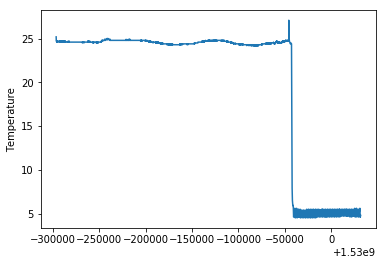

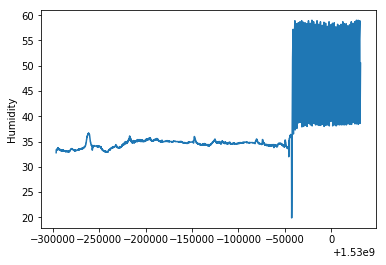

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

# get values of some columns from pandas dataframe df
mySeconds = df[['Seconds']]
myTemperature = df[['Temperature']]
myHumidity = df[['Humidity']]

# plot x versus y with x in seconds since Jan 1, 1970)
fig, ax = plt.subplots()
plt.plot(mySeconds, myTemperature)
plt.ylabel('Temperature')

fig, ax = plt.subplots()
plt.plot(mySeconds, myHumidity)
plt.ylabel('Humidity')

### Plot with matplotlib and specify x-axis as a date/time

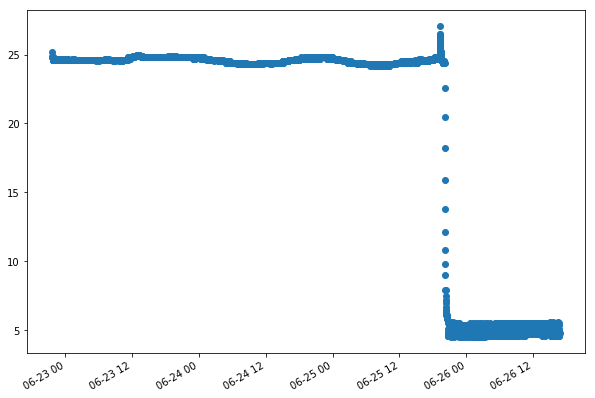

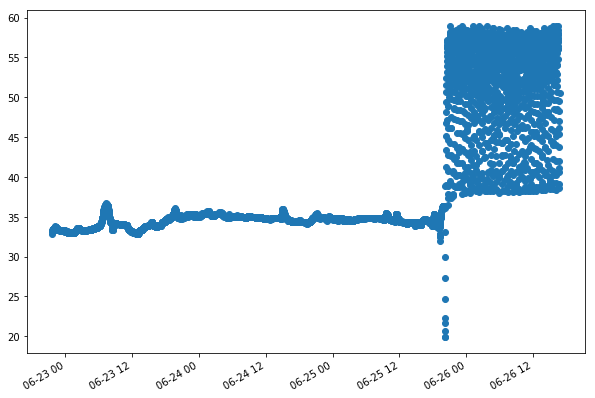

In [3]:
# specify x-axis label format
mySeconds2 = mdate.epoch2num(mySeconds)
date_fmt = '%d-%m-%y %H:%M:%S'
date_formatter = mdate.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatter)

# date/time versus myTemperature
fig, ax = plt.subplots(figsize=(10,7))
myPlot = ax.plot_date(mySeconds2, myTemperature)
fig.autofmt_xdate()

# date/time versus myHumidity
fig, ax = plt.subplots(figsize=(10,7))
myPlot = ax.plot_date(mySeconds2, myHumidity)
fig.autofmt_xdate()

### Plotting with plotly makes your plots interactive. You can pan, zoom, and hover for values.

In [4]:
# this requires local install of plotly
# pip install plotly

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# extract the actual values
mySeconds2 = mySeconds.iloc[:]['Seconds']
myTemperature2 = myTemperature.iloc[:]['Temperature']

data = [{"x": mySeconds2, 
         "y": myTemperature2}]
iplot(data)



### Homework 1. Use date/time in original fridge.log file to plot x-axis as date/time in plotly

In [5]:
myHumidity2 = myHumidity.iloc[:]['Humidity']
dataHumidity = [{"x": mySeconds2, 
         "y": myHumidity2}]
iplot(dataHumidity)


In [2]:
# plot temperature and humidity on same plot

import time
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# initialize plotly to plot inside of Jupyter notebook
init_notebook_mode(connected=True)

import urllib2 # python 2
from StringIO import StringIO # python 2

# 1) either, read the data from a url (this will only work when on Hopkins network)
url = 'http://192.168.1.4:5010/environmentlog'
response = urllib2.urlopen(url)
html = response.read() # this is full text of the log file
html = StringIO(html)
df = pd.read_csv(html)

# 2) or, load a local copy of fridge.log into a pandas dataframe
#filePath = 'fridge.log'
#df = pd.read_csv(filePath)
#

# construct a plotly friendly date/time, format is 'yyyy-mm-dd HH:MM:SS'
# we will append a new column to df called 'DateTime'
def tmpFunc(now):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(now))
                         
df['DateTime'] = df['Seconds'].apply(lambda x: tmpFunc(x))

# extact columns (these are not raw numbers yet)
myDateTime = df[['DateTime']]
myTemperature = df[['Temperature']]
myHumidity = df[['Humidity']]

# get the actual numbers from each column
myDateTime2 = myDateTime.iloc[:]['DateTime']
myTemperature2 = myTemperature.iloc[:]['Temperature']
myHumidity2 = myHumidity.iloc[:]['Humidity']

# set up two traces to plot in plotly
trace1 = go.Scatter(
    x=myDateTime2,
    y=myTemperature2,
    name='Temperature'
)
trace2 = go.Scatter(
    x=myDateTime2,
    y=myHumidity2,
    name='Humidity',
    yaxis='y2'
)

data = [trace1, trace2]

# make a plotly layout
layout = go.Layout(
    title='Temperature And Humidity',
    yaxis=dict(
        title='Temperature (deg celcius)',
        titlefont=dict(
            # this is same as default plot color #1
            color='#1f77b4'
        ),
        tickfont=dict(
            # this is same as default plot color #1
            color='#1f77b4'
        )
    ),
    yaxis2=dict(
        title='Humidity (%)',
        #titlefont=dict(
        #    color='rgb(148, 103, 189)'
        #),
        #tickfont=dict(
        #    color='rgb(148, 103, 189)'
        #),
        titlefont=dict(
            # this is same as default plot color #2
            color='#ff7f0e'
        ),
        tickfont=dict(
            # this is same as default plot color #2
            color='#ff7f0e'
        ),
        overlaying='y',
        side='right'
    )
)

# plot with plotly
fig = go.Figure(data=data, layout=layout)
plot_url = iplot(fig, filename='multiple-axes-double')


## Convert Raw temperature reading [0..1023] to degrees celcius

In [1]:
# THIS IS NOT WORKING

# 20180716
# plot temperature from an analog sensor attached to a teensy

import time, math
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# initialize plotly to plot inside of Jupyter notebook
init_notebook_mode(connected=True)

import urllib2 # python 2
from StringIO import StringIO # python 2

# 1) either, read the data from a url (this will only work when on Hopkins network)
url = 'http://10.16.81.45:5000/log'
response = urllib2.urlopen(url)
html = response.read() # this is full text of the log file
html = StringIO(html)
df = pd.read_csv(html)

# 2) or, load a local copy of fridge.log into a pandas dataframe
#filePath = 'fridge.log'
#df = pd.read_csv(filePath)
#

print('first 5 rows of log file')
print(df[1:5])

# make a new columns called 'DateTime'
df["DateTime"] = df["Date"].map(str) + df["Time"]

# extact columns (these are not raw numbers yet)
myDateTime = df[['DateTime']] # assuming yyyy-mm-dd hh:mm:ss
myTemperature = df[['Temperature']]

# get the actual numbers from each column
myDateTime2 = myDateTime.iloc[:]['DateTime']
myTemperature2 = myTemperature.iloc[:]['Temperature'] # raw sensor reading [0,1023]

# add a new column to hold celcius
df['celcius'] = df["Temperature"].map(float)
# get the numbers
myCelcius = df[['celcius']]
myCelcius2 = myCelcius.iloc[:]['celcius']

#
# convert raw analog reading [0,1023] to degrees celcius
THERMISTORNOMINAL = 10000
TEMPERATURENOMINAL = 25
BCOEFFICIENT = 3950
SERIESRESISTOR = 10000

myCelcius2 = SERIESRESISTOR / (1023 / myCelcius2 - 1)

steinhart = myCelcius2 / THERMISTORNOMINAL;     # (R/Ro)
# steinhart is now a pandas series
steinhart = steinhart.apply(math.log);                  # ln(R/Ro)
steinhart /= BCOEFFICIENT;                   # 1/B * ln(R/Ro)
steinhart += 1.0 / (TEMPERATURENOMINAL + 273.15); # + (1/To)
steinhart = 1.0 / steinhart;                 # Invert
steinhart -= 273.15;                         # convert to C

# set up a trace to plot in plotly
trace1 = go.Scatter(
    x=myDateTime2,
    y=steinhart,
    name='Temperature'
)

data = [trace1]

# make a plotly layout
layout = go.Layout(
    title='Temperature',
    yaxis=dict(
        title='Temperature (deg celcius)',
        titlefont=dict(
            # this is same as default plot color #1
            color='#1f77b4'
        ),
        tickfont=dict(
            # this is same as default plot color #1
            color='#1f77b4'
        )
    )
)

# plot with plotly
fig = go.Figure(data=data, layout=layout)
plot_url = iplot(fig, filename='just-temperature')

# homework, make x-axis more pretty and readable

first 5 rows of log file
   Hostname        Date      Time       Seconds  Temperature  Humidity
1  pilogger  2018-07-13  12:59:26  1.531501e+09          500       NaN
2  pilogger  2018-07-13  13:00:26  1.531501e+09          498       NaN
3  pilogger  2018-07-13  13:01:26  1.531501e+09          499       NaN
4  pilogger  2018-07-13  13:02:26  1.531501e+09          502       NaN
